## Practicing Simple and Multiple Polynomial Regression On FuelConsumptionCo2 Dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # to scrap dataset
from sklearn.metrics import r2_score

### Define Dataset

In [78]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [79]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Prepeocessing

In [81]:
cdf = df[["VEHICLECLASS", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]] # we chose this features.

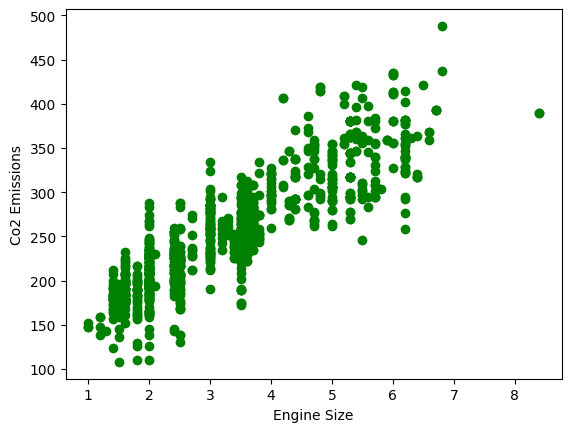

In [82]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
plt.xlabel("ENGINE SIZE".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

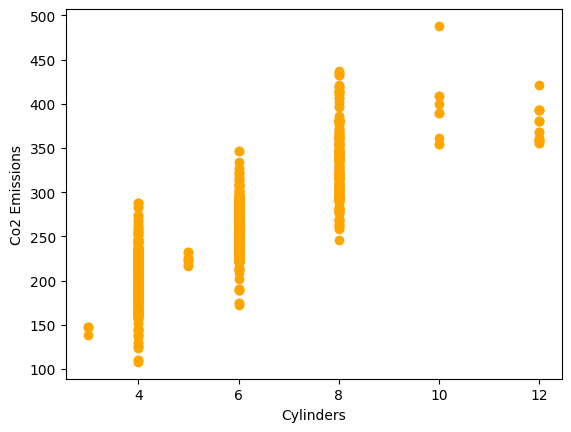

In [83]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color="orange")
plt.xlabel("CYLINDERS".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

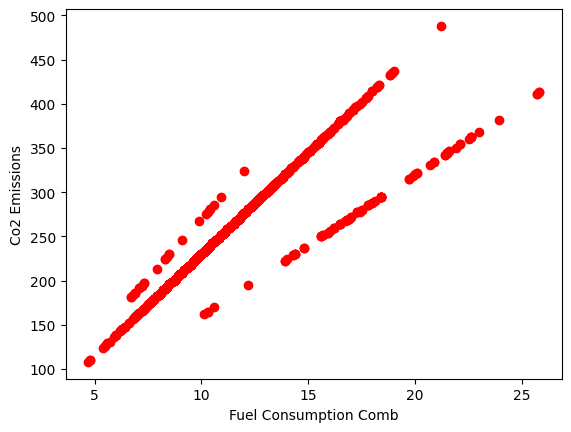

In [84]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color="red")
plt.xlabel("FUEL CONSUMPTION COMB".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

In [85]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((854, 5), (213, 5))

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### On ENGINESIZE Feature
#### Preprocessing

In [87]:
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [88]:
poly = PolynomialFeatures(degree=3)

In [89]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### Model Definition

In [90]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"Intercept : {mymodel.intercept_[0]} | Coefficient : {mymodel.coef_[0][0]}, {mymodel.coef_[0][1]}, {mymodel.coef_[0][2]}, {mymodel.coef_[0][3]}")

Intercept : 135.39589437281063 | Coefficient : 0.0, 24.9831143746936, 5.24944212219292, -0.5313805077747524


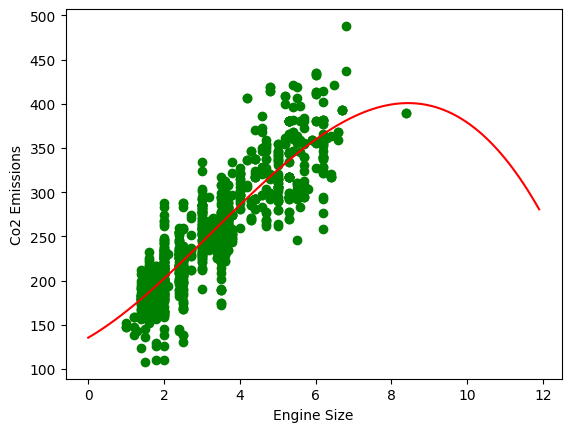

In [91]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
x = np.arange(0, 12, 0.1)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2) + mymodel.coef_[0][3] * np.pow(x, 3)
plt.plot(x, y, color="red")
plt.xlabel("ENGINE SIZE".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

### Model Evaluation

In [92]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 1111.70451 | Mean Absolute Error : 24.99119 | R2 Score : 0.71983


### On CYLINDERS Feature
#### Prerpocessing

In [93]:
x_train = np.asanyarray(train[["CYLINDERS"]])
x_train_poly = poly.fit_transform(x_train)

x_test = np.asanyarray(test[["CYLINDERS"]])
x_test_poly = poly.transform(x_test)

In [94]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"Intercept : {mymodel.intercept_[0]} | Coefficient : {mymodel.coef_[0][0]}, {mymodel.coef_[0][1]}, {mymodel.coef_[0][2]}, {mymodel.coef_[0][3]}")

Intercept : 259.3018027859398 | Coefficient : 0.0, -61.734500766123574, 14.675019900527658, -0.7251220098114857


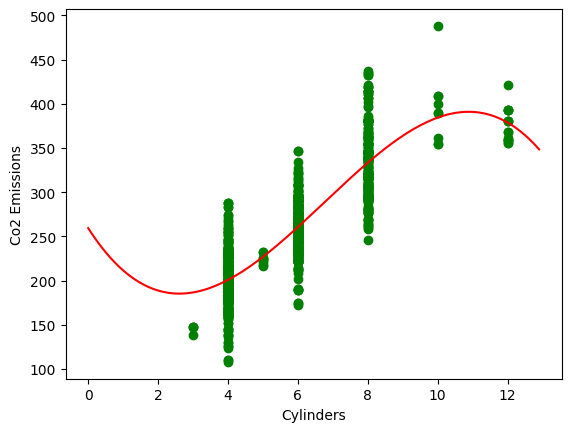

In [95]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color="green")
x = np.arange(0, 13, 0.1)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2) + mymodel.coef_[0][3] * np.pow(x, 3)
plt.plot(x, y, color="red")
plt.xlabel("CYLINDERS".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

### Model Evaluation

In [96]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 1235.72433 | Mean Absolute Error : 27.73770 | R2 Score : 0.68857


### ON ENGINESIZE And FUELCONSUMPTION_COMB Features.
#### Preprocessing

In [97]:
x_train = np.asanyarray(train[["ENGINESIZE", "FUELCONSUMPTION_COMB"]])
x_train_poly = poly.fit_transform(x_train)

x_test = np.asanyarray(test[["ENGINESIZE", "FUELCONSUMPTION_COMB"]])
x_test_poly = poly.transform(x_test)

### Model Definition

In [98]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [99]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 401.04259 | Mean Absolute Error : 11.70298 | R2 Score : 0.89893


### On VEHICLECLASS Feature
#### Preprocessing

In [100]:
train, test = train.copy(), test.copy() # because of a warning

mean_enginesize = train.groupby("VEHICLECLASS")["CO2EMISSIONS"].mean()
train["VEHICLECLASS_encoded"] = train["VEHICLECLASS"].map(mean_enginesize) # encode VEHICLECLASS with target encoding.
test["VEHICLECLASS_encoded"] = test["VEHICLECLASS"].map(mean_enginesize)

train.drop("VEHICLECLASS", axis=1, inplace=True)
test.drop("VEHICLECLASS", axis=1, inplace=True)

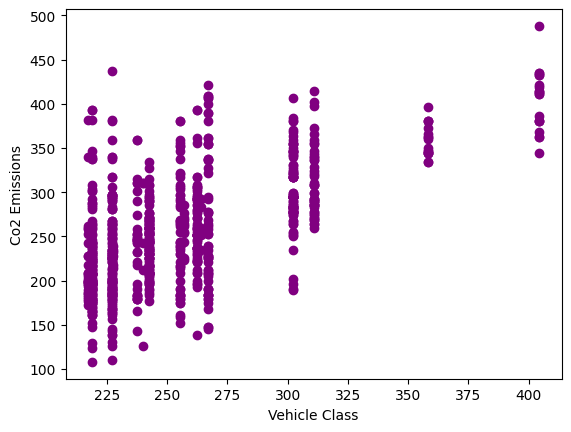

In [101]:
plt.scatter(train["VEHICLECLASS_encoded"], train["CO2EMISSIONS"], color="purple")
plt.xlabel("VEHICLE CLASS".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

In [103]:
x_train = np.asanyarray(train[["VEHICLECLASS_encoded"]])
x_train_poly = poly.fit_transform(x_train)

x_test = np.asanyarray(test[["VEHICLECLASS_encoded"]])
x_test_poly = poly.transform(x_test)

### Model Definition

In [104]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"Intercept : {mymodel.intercept_[0]} | Coefficient : {mymodel.coef_[0]}")

Intercept : -2.971972890009056e-09 | Coefficient : [0.00000000e+00 1.00000000e+00 2.05998413e-15 1.11022302e-16]


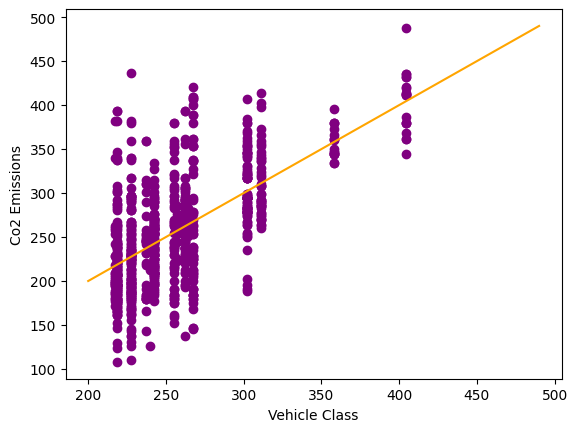

In [105]:
plt.scatter(train["VEHICLECLASS_encoded"], train["CO2EMISSIONS"], color="purple")
x = np.arange(200, 500, 10)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2) + mymodel.coef_[0][3] * np.pow(x, 3)
plt.plot(x, y, color="orange")
plt.xlabel("VEHICLE CLASS".lower().title())
plt.ylabel("CO2 EMISSIONS".lower().title())
plt.show()

### Model Evaluation

In [106]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute erro : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 2040.58500 | Mean Absolute Erro : 36.11968 | R2 Score : 0.48573


### On VEHICLECLASS and ENGINESIZE Feature
#### Preprocessing

In [107]:
x_train = np.asanyarray(train[["ENGINESIZE", "VEHICLECLASS_encoded"]])
x_train_poly = poly.fit_transform(x_train)

x_test = np.asanyarray(test[["ENGINESIZE", "VEHICLECLASS_encoded"]])
x_test_poly = poly.transform(x_test)

### Model Definition

In [108]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [109]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error: {mse:.5f}| mean absolute error: {mae:.5f}| r2 score: {r2:.5f}")

mean squared error: 853.75775| mean absolute error: 22.25162| r2 score: 0.78484
